<center>
<h1>Chapter 10</h1>
</center>


#Roadmap (so far)

1. We have looked at data wrangling and are in good shape.

2. We have a process for splitting data into train and test sets.

3. We have looked briefly at the theory of "learning" in many machine learning models. This has surfaced concepts like SGD, Epochs, Batch and Regularization. These will become important later.

4. We looked briefly at LIME as a means to give an end-user more information.

I'd like to stay focused on the end-user but turn to alternatives to accuracy to provide more information.

##What information can we give the end customer to help make a decision?

* You may say just give them a prediction: Yes/1 or No/0.

* But there is more information we can provide that puts more of the decision in the customer's hands.

That is what I would like to take up in this chapter. We saw how Lime might help in last chapter. Let's consider some other type of information that focuses on that threshold we introduced in the previous chapter.

In [1]:
github_name = 'MarvNC'
repo_name = 'cs523'
source_file = 'library.py'
url = f'https://raw.githubusercontent.com/{github_name}/{repo_name}/main/{source_file}'
!rm $source_file
!wget $url
%run -i $source_file

rm: cannot remove 'library.py': No such file or directory
--2025-05-14 02:16:18--  https://raw.githubusercontent.com/MarvNC/cs523/main/library.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45423 (44K) [text/plain]
Saving to: ‘library.py’

library.py          100%[===================>]  44.36K  --.-KB/s    in 0.01s   

2025-05-14 02:16:18 (3.54 MB/s) - ‘library.py’ saved [45423/45423]



In [2]:
#to be compatible?
titanic_variance_based_split = 107
customer_variance_based_split = 113

In [3]:
url = 'https://raw.githubusercontent.com/fickas/asynch_models/refs/heads/main/datasets/titanic_trimmed.csv'
titanic_trimmed = pd.read_csv(url)

In [4]:
titanic_features = titanic_trimmed.drop(columns='Survived')
titanic_features.head()  #print first 5 rows of the table

,Age,Gender,Class,Joined,Married,Fare
0,41.0,Male,C3,Southampton,0.0,7.0
1,21.0,Male,Crew,Southampton,0.0,0.0
2,13.0,Male,C3,Southampton,NaN,20.0
3,16.0,Male,C3,Southampton,0.0,NaN
4,NaN,Male,C2,Cherbourg,0.0,24.0


In [5]:
labels = titanic_trimmed['Survived'].to_list()

In [6]:
X_train, X_test, y_train, y_test = titanic_setup(titanic_trimmed)

[Pipeline] ........ (step 1 of 9) Processing map_gender, total=   0.0s


[Pipeline] ......... (step 2 of 9) Processing map_class, total=   0.0s
[Pipeline] ..... (step 3 of 9) Processing target_joined, total=   0.0s
[Pipeline] ......... (step 4 of 9) Processing tukey_age, total=   0.0s
[Pipeline] ........ (step 5 of 9) Processing tukey_fare, total=   0.0s
[Pipeline] ......... (step 6 of 9) Processing scale_age, total=   0.0s
[Pipeline] ........ (step 7 of 9) Processing scale_fare, total=   0.0s
[Pipeline] ............ (step 8 of 9) Processing impute, total=   0.1s
[Pipeline] ....... (step 9 of 9) Processing passthrough, total=   0.0s


/content/library.py:1117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


In [7]:
X_train.std(axis=0) #array([0.75333128, 0.47741652, 1.03590395, 0.0872873 , 0.47611519, 1.23157575])

array([0.75333128, 0.47741652, 1.03590395, 0.0872873 , 0.47611519,
       1.23157575])

In [8]:
X_train[:10]

array([[ 0.78947368,  1.        ,  1.        ,  0.40075188,  0.        ,
        -0.26086957],
       [-1.31578947,  0.        ,  1.        ,  0.40075188,  0.        ,
         0.60869565],
       [ 0.05263158,  1.        ,  0.        ,  0.40075188,  0.        ,
         3.73913043],
       [-0.42105263,  1.        ,  2.        ,  0.40075188,  0.        ,
         0.56521739],
       [ 0.31578947,  0.        ,  2.        ,  0.40075188,  0.        ,
        -0.13043478],
       [ 0.10526316,  0.        ,  0.        ,  0.40075188,  1.        ,
        -0.56521739],
       [ 0.63157895,  0.        ,  3.        ,  0.40075188,  1.        ,
         0.56521739],
       [ 0.47368421,  1.        ,  2.        ,  0.40075188,  1.        ,
         0.        ],
       [ 0.47368421,  1.        ,  0.        ,  0.40075188,  1.        ,
        -0.56521739],
       [-0.26315789,  0.        ,  1.        ,  0.40075188,  1.        ,
        -0.26086957]])

<pre>
array([[ 0.78947368,  1.        ,  1.        ,  0.40075188,  0.        ,
        -0.26086957],
       [-1.31578947,  0.        ,  1.        ,  0.40075188,  0.        ,
         0.60869565],
       [ 0.05263158,  1.        ,  0.        ,  0.40075188,  0.        ,
         3.73913043],
       [-0.42105263,  1.        ,  2.        ,  0.40075188,  0.        ,
         0.56521739],
       [ 0.31578947,  0.        ,  2.        ,  0.40075188,  0.        ,
        -0.13043478],
       [ 0.10526316,  0.        ,  0.        ,  0.40075188,  1.        ,
        -0.56521739],
       [ 0.63157895,  0.        ,  3.        ,  0.40075188,  1.        ,
         0.56521739],
       [ 0.47368421,  1.        ,  2.        ,  0.40075188,  1.        ,
         0.        ],
       [ 0.47368421,  1.        ,  0.        ,  0.40075188,  1.        ,
        -0.56521739],
       [-0.26315789,  0.        ,  1.        ,  0.40075188,  1.        ,
        -0.26086957]])
</pre>

In [9]:
y_train[:10]  #array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

#I. Big idea 1: Confusion Matrix


The Confusion Matrix as a picture, in its full glory, below. Note that this is for a binary classification problem.

If you have a machine learning algorithm (e.g., logistic regression) that is focusing on a target column that is binary, e.g., `Gender, Married, Survived, Outcome`, then you can use this table to compute alternative goodness scores.

<img src='https://www.dropbox.com/s/rt01u5jwvs27a2d/Screen%20Shot%202021-04-22%20at%203.19.20%20PM.png?raw=1' height=300>

##Lots of functions off to the sides

There are 4 basic values: TP (true positive), TN (true negative), FP (false positive) and FN (false negative).
I count 14 separate functions off to the side of these core values. Note that all use only the four base values, sometimes all of them, sometimes a subset.

You can see `Accuracy` up in the top right corner.

Here they are in list form plus some others more recenltly added.

<img src='https://www.dropbox.com/s/125j5wk4j89k996/Screen%20Shot%202021-04-22%20at%203.21.04%20PM.png?raw=1' height=700>

Let's look at a couple in particular.

#II. Precision from confusion matrix above

<img src='https://www.dropbox.com/s/i8pbhw3vu1tjpga/Screen%20Shot%202021-04-23%20at%202.38.12%20PM.png?raw=1' height=100>

Precision asks, out of the items that the classifier predicted to be 1, how many are actually 1?
Notice that it ignores the negative case. If I never had a false-positive then its value is 1.0. If all I had were false-positives, i.e., never predicted 1 correctly, the value is 0.0.

It's kind of like the commercial: I may not guess 1 often, but when I do, I am always right.

Or the opposite: no matter how hard I try, whenever I guess 1, I am always wrong.

Precision makes sense when raising false alerts is costly and you really want all the positive predictions to be worth looking into.

#III. Recall from confusion matrix above

<img src='https://www.dropbox.com/s/hm304s3gqretsq6/Screen%20Shot%202021-04-23%20at%202.41.07%20PM.png?raw=1' height=100>

Recall asks the question: Out of all the items that are 1, how many are found to be 1 by the classifier? So this one is a little different than precision. I cannot cheat by rarely guessing 1. I have to predict all the 1s correctly.

Of course, one way to do this is to always predict 1, right?

Recall is a go-to metric when you really care about catching all Diabetes onset cases even at a cost of false alerts. Potentially it is cheap to deal with false alerts and very expensive when the onset goes unseen.


#IV. F1 score

<img src='https://www.dropbox.com/s/86z2pit0ics24p5/Screen%20Shot%202021-04-26%20at%209.52.10%20AM.png?raw=1' height=150>

The F1 score tries to strike a balance between Precision and Recall. It has become the standard score reported in literature for the power of machine learning algorithms.

##About the F1 score

The F1 score is the harmonic mean of precision and recall.
The F1 score ranges from 0 to 1, where 1 is the best possible value, indicating perfect precision and recall, and 0 is the worst value, indicating that either precision or recall is zero. The F1 score is particularly useful when dealing with imbalanced datasets because it takes both precision and recall into account, providing a balanced measure of the classifier's performance.

**Why the harmonic mean instead of just the average?**

The harmonic mean is used in the F1 score instead of the arithmetic mean (simple average) because it helps provide a more balanced measure of the classifier's performance, particularly when precision and recall are significantly different from each other.

The harmonic mean is less sensitive to extreme values compared to the arithmetic mean. When either precision or recall is very low, the harmonic mean will also be low, regardless of the value of the other metric. This property of the harmonic mean ensures that a classifier must perform well in both precision and recall to achieve a high F1 score.

For example, let's consider two classifiers with the following precision and recall values:
<pre>
Classifier A: Precision = 0.9, Recall = 0.1

Classifier B: Precision = 0.6, Recall = 0.6

Using the arithmetic mean:

F1 score (Classifier A) = (0.9 + 0.1) / 2 = 0.5

F1 score (Classifier B) = (0.6 + 0.6) / 2 = 0.6

Using the harmonic mean:

F1 score (Classifier A) = 2 * (0.9 * 0.1) / (0.9 + 0.1) ≈ 0.18

F1 score (Classifier B) = 2 * (0.6 * 0.6) / (0.6 + 0.6) = 0.6
</pre>
The arithmetic mean would give Classifier A a higher score than its actual performance warrants because it doesn't penalize the low recall value enough. In contrast, the harmonic mean significantly penalizes Classifier A's low recall, resulting in a more balanced evaluation of the classifier's performance.

By using the harmonic mean in the F1 score, we ensure that both precision and recall are taken into account, and the classifier must achieve good results in both metrics to obtain a high F1 score. This is especially important when false positives and false negatives carry different costs or importance.


**Why is it called the harmonic mean?**

The harmonic mean is so named because it has a connection to the concept of harmonics in mathematics and music theory. It is one of the three Pythagorean means, along with the arithmetic mean and the geometric mean, which are defined for a set of positive numbers. These means are named based on their relationship to the sides of similar right triangles in geometry, where the arithmetic, geometric, and harmonic means correspond to the altitude, geometric mean of the legs, and the harmonic mean of the legs, respectively.

The harmonic mean, H, of a set of n positive numbers (x1, x2, ..., xn) is defined as the reciprocal of the arithmetic mean of the reciprocals of those numbers:


H = n / (1/x1 + 1/x2 + ... + 1/xn)

f1 = 2/(1/p + 1/r) = 2*(p*r)/(p+r)

In music theory, when two notes are played simultaneously, the ratio of their frequencies determines the harmony between the notes. Simple ratios, like 2:1 or 3:2, produce consonant (harmonious) intervals, while complex ratios, like 16:15, produce dissonant (less harmonious) intervals. The harmonic mean of two frequencies produces a frequency that is "in between" the original frequencies in terms of harmony. This relationship between frequencies and the harmonic mean contributes to its name.

In the context of the F1 score, the name "harmonic mean" is not directly related to its application. Instead, it is used because of its mathematical properties, which make it suitable for combining precision and recall in a balanced way, as explained in the previous answer.

**What is the f-beta score?**

The F-beta score is a generalization of the F1 score that allows you to give different weights to precision and recall based on the specific requirements of a classification problem. The F-beta score is calculated using the harmonic mean of precision and recall, just like the F1 score, but it introduces a weighting factor called 'beta' that allows you to adjust the relative importance of precision and recall.

The F-beta score is defined as:

F-beta score = (1 + beta^2) * (Precision * Recall) / ((beta^2 * Precision) + Recall)

Here, the 'beta' parameter determines the weight of recall relative to precision:

If beta > 1, more emphasis is placed on recall, meaning that false negatives are considered more costly than false positives.
If beta < 1, more emphasis is placed on precision, meaning that false positives are considered more costly than false negatives.
If beta = 1, equal importance is given to precision and recall, resulting in the F1 score.

The F-beta score allows you to fine-tune the performance metric based on the specific needs of your classification problem. For example, in a medical diagnosis application, you might prioritize minimizing false negatives (i.e., not missing any actual cases of a disease) by using a higher beta value. In contrast, for a spam email filter, you might prioritize minimizing false positives (i.e., not marking legitimate emails as spam) by using a lower beta value.

By adjusting the beta parameter, you can tailor the F-beta score to the requirements of your classification problem, ensuring that the performance metric reflects the desired trade-off between precision and recall.

#V. Problems with Precision, Recall and F1

You may notice that none use TN. So you could be predicting thousands of rows as TN correctly and it would not influence any of the 3 metrics.

Why? They assume positive case is rare one and hard to classify. This tells you that your label column should reflect this, e.g., I made survival be 1 because it was the rare case in Titanic. I could have just as easily made it 0, but that would not align with these metrics.

##But we now have asymmetry in choosing label values

Look at this example matrix, which has an outcome (label) column with 1 being "has disease" and 0 being "no disease."



<img src='https://www.dropbox.com/s/w5fcwxgymxfo4wk/Screen%20Shot%202021-04-22%20at%203.07.06%20PM.png?raw=1' height=300>

##What if I flipped the Outcome column?

I now view 1 as no-disease and 0 as disease. So now I have TP as 139. Before it was 41. I will get a whole new F1 score. Same data. Same model. But flipping the Outcome column gives me different scores. Kind of a problem.

## F1 score might be good enough

It is important to recognize that the majority class is normally labeled as negative as with the Titanic dataset. This is because of the convention that rarer or more ‘interesting’ outcomes are usually labeled as positive, such as patients who have a rare disease (they are tested positive). For these problems, the F1 score fulfills its purpose of being a good metric by placing more emphasis on the positive class.

#VI. MCC new (old) kid on the block

Maybe newly rediscovered is way to put it. Here it is:

<img src='https://www.dropbox.com/s/uaw4mehz347io4l/Screen%20Shot%202021-04-26%20at%201.22.23%20PM.png?raw=1'>

where worst value =−1 and best value =+1. And Cov(c,l) is the covariance of the classes c and predicted labels l and σc and σl are the standard deviations, respectively.

Another way to view that denominator is:

<pre>
(labeled-1 * labeled-0 * actual-1 * actual-0)**.5
</pre>

Cite: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7863449/ (2021), https://stats.stackexchange.com/a/468301.



##MCC is symmetric and uses all values

I can flip Outcome column and still get same MCC score.

And it is more wholistic, looking at all 4 values.

In [10]:
from sklearn.metrics import matthews_corrcoef
actuals = [1,0,1,0]
yhat = [1,1,1,0]
print(actuals,yhat)

matthews_corrcoef(actuals,yhat)

[1, 0, 1, 0] [1, 1, 1, 0]


np.float64(0.5773502691896258)

###Now I will flip with xor

In [11]:
actuals = np.array(actuals)^1  #numpy xor
yhat = np.array(yhat)^1
print(actuals,yhat)

matthews_corrcoef(actuals,yhat)

[0 1 0 1] [0 0 0 1]


np.float64(0.5773502691896258)

##Really the pratcice of your field that decides

If your field is Education, perhaps they use metric X. If it is Biology, metric Y. If Psychology, metric Z. You can get a feel for this by looking at published reports. What standard is the journal upholding for getting published?  In ML field, it is typically F1 score.

#VII. Big idea 2: playing with thresholds

The general idea is that we can actually change the decision component of our algorithm to be more strict or lenient on what it predicts as a `1` (or a `0`). This normally goes hand in hand with an algorithm that gives a probabilistic prediction, which is true of all the ML algorithms we will look at. Let's say our algorithm predicts in a range `0` to `1`. Place to start is anything equal or over `.5` is a `1` and under a `0`.

###That choice of `.5` is the threshold

All the models we will see use `.5` as a threshold. However, they all allow us to get the raw value between `0` and `1` if we want. That is exactly what we want!


###What happens if I increase the threshold to `.6`?

I'd expect to see fewer `1`s predicted (and hence more `0`s). I've made it harder to be positive. I could increase it up to `1.0`, right? Wow. That is strict. But the upside is that now when I predict 1, I am pretty sure it really is a 1. So Precision goes up.

###What happens if I decrease the threshold to `.4`?

I make it easier to predict `1`s. I'll get more `1`s and less `0`s I expect. I could decrease it to `0` to always predict `1`. Upside is Recall goes up.

###It's a tradeoff

Really the end-user has to decide if they value Precision over Recall, or instead want a balance (F1 score). But you have to give them the information to help make that decision. That comes next.


#VIII. Exploring thresholds

I'd like to explore using thresholds with Logistic Regression. So I will ask a LogisticRegression model to give us a probability output then play around with thresholds to see how that affects Precision, Recall, etc.

##We can use confusion matrix to get a picture of what is going on

I wrote this function to plot the matrix for us.

In [12]:
#zipped list of (act,pred)
import matplotlib.pyplot as plt

def heat_map(zipped, label_list=(0,1)):
  zlist = list(zipped)
  n = len(label_list)
  case_list = []
  for i in range(n):
    inner_list = []
    for j in range(n):
      inner_list.append(zlist.count((label_list[i], label_list[j])))
    case_list.append(inner_list)

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.imshow(case_list)
  ax.grid(False)
  title = ''
  for i,c in enumerate(label_list):
    title += f'{i}={c} '
  ax.set_title(title)
  ax.set_xlabel('Predicted outputs', fontsize=16, color='black')
  ax.set_ylabel('Actual outputs', fontsize=16, color='black')
  ax.xaxis.set(ticks=range(n))
  ax.yaxis.set(ticks=range(n))

  for i in range(n):
      for j in range(n):
          ax.text(j, i, case_list[i][j], ha='center', va='center', color='white', fontsize=32)
  plt.show()
  return None

##Ok, now need some predictions

Notice I am using the method `model.predict_proba(X_test_transformed)[:,1]` to produce values between `0` and `1`.

In [13]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, random_state=1, max_iter=5000)
model.fit(X_train, y_train)  #train the model
yraw = model.predict_proba(X_test)[:,1]  #test set -  getting probabilities of 1
print(yraw[:10])

[0.63957176 0.75783195 0.86293136 0.24254144 0.25930501 0.38719113
 0.62032998 0.21299512 0.6475531  0.17298847]


##Now set threshold to standard `.5`

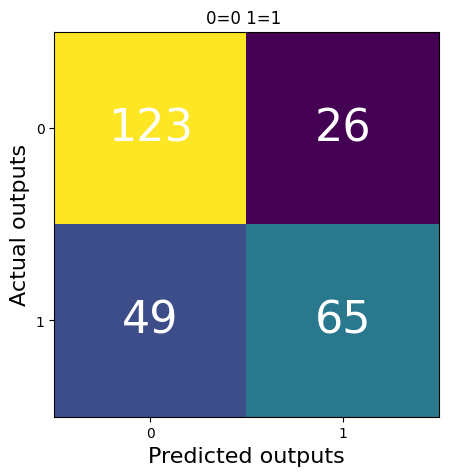

In [14]:
threshold = .5
yhat = [1 if v >=threshold else 0 for v in yraw]
heat_map(zip(y_test,yhat))  #see definition above

Looks like 26 FP and 49 FN.

##Our first experiment: set threshold to `.8`

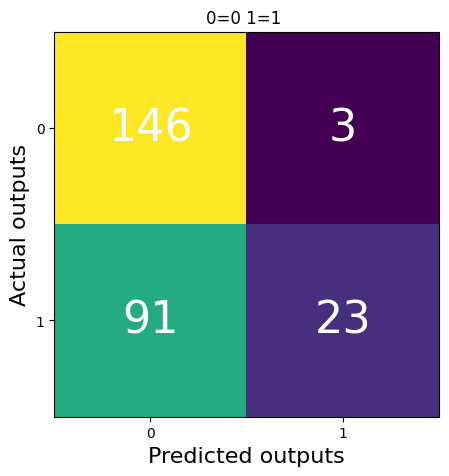

In [15]:
threshold = .8
yhat = [1 if v >=threshold else 0 for v in yraw]
heat_map(zip(y_test,yhat))

The good news is that we now have reduced false positives to 3. Precision metric will be happy about that.

The bad news is on the bottom row. We now only have 23 TP and increase FN to 91. Recall will suffer.

##Let's go other way and lower threshold

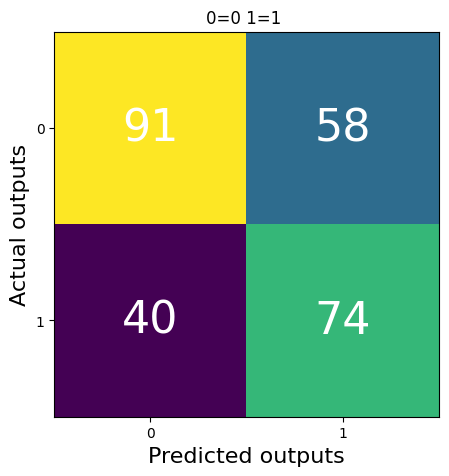

In [16]:
threshold = .3
yhat = [1 if v >=threshold else 0 for v in yraw]
heat_map(zip(y_test,yhat))

We now have 74 true positives! But no free lunch. Now have increased false positives.

## Let's bring this under control

I'd like values for a whole set of thresholds. And from the confusion matrix, let's use goodness measures Precision, Recall, F1 and accuracy.

I created a function to do this and keep track of results.

I also created a column for something called auc (Area Under the Curve), which we will get to in just a little bit).

#Note - added max styling

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score  #add to your library along with all these functions


In [18]:
def threshold_results(thresh_list, actuals, predicted):
  result_df = pd.DataFrame(columns=['threshold', 'precision', 'recall', 'f1', 'auc', 'accuracy'])
  for t in thresh_list:
    yhat = [1 if v >=t else 0 for v in predicted]
    #note: where TP=0, the Precision and Recall both become 0. And I am saying return 0 in that case.
    precision = precision_score(actuals, yhat, zero_division=0)
    recall = recall_score(actuals, yhat, zero_division=0)
    f1 = f1_score(actuals, yhat)
    accuracy = accuracy_score(actuals, yhat)
    auc = roc_auc_score(actuals, predicted)
    result_df.loc[len(result_df)] = {'threshold':t, 'precision':precision, 'recall':recall, 'f1':f1, 'auc': auc, 'accuracy':accuracy}

  result_df = result_df.round(2)

  #Next bit fancies up table for printing. See https://betterdatascience.com/style-pandas-dataframes/
  #Note that fancy_df is not really a dataframe. More like a printable object.
  headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #800000; color: white; text-align: center"
  }
  properties = {"border": "1px solid black", "width": "65px", "text-align": "center"}

  fancy_df = result_df.style.highlight_max(color = 'pink', axis = 0).format(precision=2).set_properties(**properties).set_table_styles([headers])
  return (result_df, fancy_df)

In [19]:
result_df, fancy_df = threshold_results(np.round(np.arange(0.0,1.01,.05), 2), y_test, yraw)
fancy_df

,threshold,precision,recall,f1,auc,accuracy
0,0.00,0.43,1.00,0.60,0.68,0.43
1,0.05,0.43,1.00,0.60,0.68,0.43
2,0.10,0.43,1.00,0.60,0.68,0.43
3,0.15,0.44,1.00,0.61,0.68,0.44
4,0.20,0.45,0.86,0.59,0.68,0.48
5,0.25,0.48,0.71,0.57,0.68,0.54
6,0.30,0.56,0.65,0.60,0.68,0.63
7,0.35,0.63,0.61,0.62,0.68,0.68
8,0.40,0.66,0.59,0.62,0.68,0.69
9,0.45,0.71,0.57,0.63,0.68,0.71


In [20]:
type(fancy_df)  #not a dataframe!

pandas.io.formats.style.Styler

In [21]:
result_df

,threshold,precision,recall,f1,auc,accuracy
0,0.00,0.43,1.00,0.60,0.68,0.43
1,0.05,0.43,1.00,0.60,0.68,0.43
2,0.10,0.43,1.00,0.60,0.68,0.43
3,0.15,0.44,1.00,0.61,0.68,0.44
4,0.20,0.45,0.86,0.59,0.68,0.48
5,0.25,0.48,0.71,0.57,0.68,0.54
6,0.30,0.56,0.65,0.60,0.68,0.63
7,0.35,0.63,0.61,0.62,0.68,0.68
8,0.40,0.66,0.59,0.62,0.68,0.69
9,0.45,0.71,0.57,0.63,0.68,0.71


In [22]:
type(result_df)  #is a dataframe

pandas.core.frame.DataFrame

#Let's check in here

We will give the end customer something that looks a lot like table above on our web page. So the process is:

1. Customer inputs some new data (we have never seen).
2. We run our trained model on the new data.
3. We get a prediction as a probability, let's say `.76`.
4. We show the customer the probability, along with the table above.
5. The customer decides how to view that probability using the table.

Let's say the customer values Precision. Maybe a doctor. They want to avoid False Positives, which could lead to unnecessary lengthy and expensive treatment.

Looking at the table, a threshold of `.75` gives a Precision score of `.85`. And our model produced `.76`.

So the question is is that Precision value good enough for the customer? This is really a question the customer has to answer. Perhaps the customer has said "anything below `.9` Precision is not good enough". In that case, even with a moderately high probability of `.76`, it would be viewed as a 0 or negative case. The customer has set the threshold at `.85` to get `.9` Precision. Any probability produced by the model below `.85` is viewed as negative (0).

##Our goal is to give customer the best model

And the best model will be one that gives the best trade-off choices. So let's see how we can measure different models on the trade-offs they provide. In later chapters, we will attempt to fine-tune our models with trade-off in mind.

#Note

Good article on alternatives to roc-auc: https://towardsdatascience.com/the-metric-system-how-to-correctly-measure-your-model-17d3feaed6ab

#IX. Precision-Recall tradeoff curve

Here is the plot.

It's really a tradeoff plot. You can choose the point that maximizes precision or recall. Or a point that is about average for both. Once you choose your point, you can look up the threshold to use.

I am using the `plotly.express` library because I could not see an easy way to do it with `matplotlib`.

In [23]:
import plotly.express as px

In [24]:
result_df.sort_values(by='precision', ascending=True, inplace=True) #nice way to sort a dataframe on a column

###`plotly.express` in action

Cool that it works directy on a dataframe.

In [25]:
fig = px.line(
    data_frame=result_df,
    x='precision',
    y='recall',
    title='Precision v. Recall curve',
    hover_data=['accuracy', 'threshold', 'f1'])
fig.update_traces(mode='markers+lines')
fig.show()

###Or maybe precision against accuracy

In [26]:
fig = px.line(
    data_frame=result_df,
    x='precision',
    y='accuracy',
    title='Precision v. Accuracy',
    hover_data=['threshold', 'recall', 'f1'])
fig.update_traces(mode='markers+lines')
fig.show()

#X. ROC as alternative

I like the [Wikipedia description](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)of ROC and AUC. ROC is a twist on what we have been plotting. It has something called TPR which is exactly our Recall - how many 1s did we predict correctly out of total 1s? But it has a new metric on X axis called FPR, which measures how many 1s did we predict incorrectly. In essence, FPR = 1-TPR.

As normal, it plots values across a range of thresholds, so that is same as we have been doing. Here is an example plot.

<img src='https://i.stack.imgur.com/kxfbR.png' height=300>

The grayed out area is called the AUC or area under the curve. My personal view of this area is that the larger it is, the more room for good tradeoffs for the end-user. A large area means that even if we favor TPR over FPR, we will still likely be able to find a threshold that does well on both. So it measures quality of tradeoffs versus accuracy.

We can use AUC to compare two different models: could be same algorithm (e.g., KNN) with different parameter values for training (e.g., different K values) or could be two different algorithms altogether. In Challenge 2, I'll ask you to do exactly that. Train different models and choose the one with best tradeoff space, i.e., highest AUC value.

###Further reading on AUC

https://academic.oup.com/ije/article/49/4/1397/5714095

###Just to see, let's check out our current model

We have results from

`model = LogisticRegressionCV(cv=5, random_state=1, max_iter=5000)`

Let's plot its ROC and compute AUC. BTW: the AUC value varies from 1 (perfect) to 0 (kind of perfect - it predicts exactly wrong everytime so we can just take its inverse to get perfect). A value of `.5` is really useless.


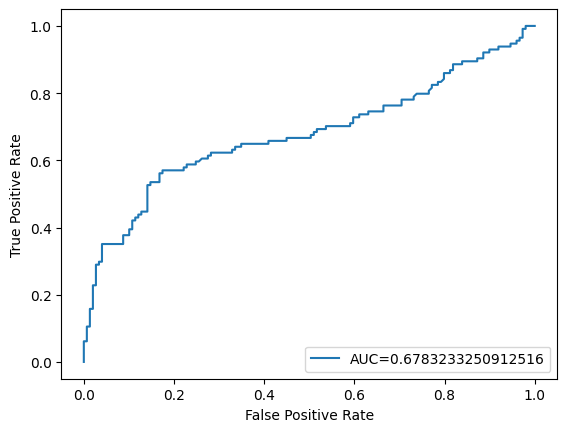

In [27]:
from sklearn import metrics
fpr, tpr, thresholds_used = metrics.roc_curve(y_test,  yraw)  #gives us list of values at different thresholds
auc = metrics.roc_auc_score(y_test, yraw)  #compute Area Under the Curve

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###Is that good?

Not great. An AUC of .5 is basically useless. And we are not too far off from that. The plot kind of bears this out

#Closing

* Given a machine learning algorithm produces a probability, a threshold parameter that can be defined for predicting binary outcomes.

* You can vary the threshold value to optimize on specific metrics, e.g., Precision versus Recall.

* As an alternative to using pure accuracy, you can use AUC to compare different models. We will do this in following chapters.

* Precision-Recall and F1 metric are best suited to
imbalanced outcomes where 1 (positive) is minority class. This is true of the Titanic dataset.

* You rarely use accuracy as a metric. It does not carry enough information.


#Challenge 1

I decided to get in on the action. I am defining a "Steve_Score" that is the average of precision, recall, f1 and accuracy.

Hey, why not? Maybe it will catch on.

Go ahead and add a new column to `result_df` that has the `Steve_Score`. I show you my results below.

In [28]:
result_df['Steve_Score'] = (result_df['precision'] + result_df['recall'] + result_df['f1'] + result_df['accuracy'])/4

In [29]:
result_df  #should now include Steve_Score

,threshold,precision,recall,f1,auc,accuracy,Steve_Score
18,0.90,0.00,0.00,0.00,0.68,0.57,0.1425
20,1.00,0.00,0.00,0.00,0.68,0.57,0.1425
19,0.95,0.00,0.00,0.00,0.68,0.57,0.1425
0,0.00,0.43,1.00,0.60,0.68,0.43,0.6150
2,0.10,0.43,1.00,0.60,0.68,0.43,0.6150
1,0.05,0.43,1.00,0.60,0.68,0.43,0.6150
3,0.15,0.44,1.00,0.61,0.68,0.44,0.6225
4,0.20,0.45,0.86,0.59,0.68,0.48,0.5950
5,0.25,0.48,0.71,0.57,0.68,0.54,0.5750
6,0.30,0.56,0.65,0.60,0.68,0.63,0.6100


###What I get

|index|threshold|precision|recall|f1|auc|accuracy|Steve\_Score|
|---|---|---|---|---|---|---|---|
|20|1\.0|0\.0|0\.0|0\.0|0\.68|0\.57|0\.1425|
|18|0\.9|0\.0|0\.0|0\.0|0\.68|0\.57|0\.1425|
|19|0\.95|0\.0|0\.0|0\.0|0\.68|0\.57|0\.1425|
|0|0\.0|0\.43|1\.0|0\.6|0\.68|0\.43|0\.615|
|1|0\.05|0\.43|1\.0|0\.6|0\.68|0\.43|0\.615|
|2|0\.1|0\.43|1\.0|0\.6|0\.68|0\.43|0\.615|
|3|0\.15|0\.44|1\.0|0\.61|0\.68|0\.44|0\.6225|
|4|0\.2|0\.45|0\.86|0\.59|0\.68|0\.48|0\.595|
|5|0\.25|0\.48|0\.71|0\.57|0\.68|0\.54|0\.575|
|6|0\.3|0\.56|0\.65|0\.6|0\.68|0\.63|0\.61|
|7|0\.35|0\.63|0\.61|0\.62|0\.68|0\.68|0\.635|
|8|0\.4|0\.66|0\.59|0\.62|0\.68|0\.69|0\.64|
|12|0\.6|0\.71|0\.54|0\.62|0\.68|0\.71|0\.645|
|9|0\.45|0\.71|0\.57|0\.63|0\.68|0\.71|0\.6549999999999999|
|10|0\.5|0\.71|0\.57|0\.63|0\.68|0\.71|0\.6549999999999999|
|11|0\.55|0\.72|0\.56|0\.63|0\.68|0\.71|0\.6549999999999999|
|13|0\.65|0\.73|0\.5|0\.59|0\.68|0\.7|0\.63|
|14|0\.7|0\.75|0\.39|0\.52|0\.68|0\.68|0\.5850000000000001|
|15|0\.75|0\.87|0\.3|0\.44|0\.68|0\.68|0\.5725|
|16|0\.8|0\.88|0\.2|0\.33|0\.68|0\.64|0\.5125000000000001|
|17|0\.85|0\.9|0\.08|0\.15|0\.68|0\.6|0\.4325|

#Challenge 2

There is a method that will give us the AUC. I used it in threshold_table function. Let's compare some models with it.

In [30]:
from sklearn.metrics import roc_auc_score  #we used this before when plotting

In [31]:
#compute AUC for X_test - should match with plot above, i.e., .68
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, random_state=1, max_iter=500)
model.fit(X_train, y_train)
yraw = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, yraw)

np.float64(0.6783233250912516)

Reminder: the larger the area the better. It gives us more room to choose threshold values that provide tradeoffs. We can then choose what makes sense for our domain.

##Using LogisticRegressionCV please compute the ROC AUC scores for all the solvers possible.

One parameter we can choose is "solver". As reminder, here are our choices (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)):

`['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`

Default is `lbfgs`. Is it best for our Titanic data? Write a loop to record auc scores and sort to see how they stack up.

In [32]:
#record AUC score using each solver separately

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

iter_scores = []
for s in solvers:
  model = LogisticRegressionCV(cv=5, random_state=1, max_iter=500, solver=s)
  model.fit(X_train, y_train)
  yraw = model.predict_proba(X_test)[:,1]
  iter_scores.append((s, roc_auc_score(y_test, yraw)))

In [33]:
#sort on AUC score
sorted(iter_scores, key=lambda pair: pair[1], reverse=True)

[('saga', np.float64(0.6784999411279878)),
 ('liblinear', np.float64(0.678382197103497)),
 ('newton-cg', np.float64(0.6783233250912516)),
 ('lbfgs', np.float64(0.6783233250912516)),
 ('sag', np.float64(0.6783233250912516))]

###What I came up with

<pre>
[('saga', np.float64(0.6784999411279878)),
 ('liblinear', np.float64(0.678382197103497)),
 ('newton-cg', np.float64(0.6783233250912516)),
 ('lbfgs', np.float64(0.6783233250912516)),
 ('sag', np.float64(0.6783233250912516))]
 </pre>

They are all the same out to 3 decimal points so no real winner.

##BTW: congratulations

You have "tuned" your first model. You tried 5 different solvers, giving 5 different models. You now know which one is best using AUC as a measure, at least based on the solver parameter: the answer is the solver is not a good place to tune given no real winner. But there are 16 other parameters to try :)

#Challenge 3

Repeat what I did in Challenge 2 but now with the Customer dataset. Does a solver come out as a winner on this new dataset?

In [34]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPM6PqZXgmAHfRYTcDZseyALRyVwkBtKEo_rtaKq_C7T0jycWxH6QVEzTzJCRA0m8Vz0k68eM9tDm-/pub?output=csv'

In [35]:
customers_df = pd.read_csv(url)
customers_trimmed = customers_df.drop(columns='ID')  #this is a useless column which we will drop early
customers_trimmed = customers_trimmed.drop_duplicates(ignore_index=True)  #get rid of any duplicates
customers_trimmed.head()

,Gender,Experience Level,Time Spent,OS,ISP,Age,Rating
0,Female,medium,NaN,iOS,Xfinity,NaN,0
1,Male,medium,71.97,Android,Cox,50.0,0
2,Female,medium,101.81,NaN,Cox,49.0,1
3,Female,medium,86.37,Android,Xfinity,53.0,0
4,Female,medium,103.97,iOS,Xfinity,58.0,0


In [36]:
X_train, X_test, y_train, y_test = customer_setup(customers_trimmed)



[Pipeline] ........... (step 1 of 10) Processing map_os, total=   0.0s
[Pipeline] ....... (step 2 of 10) Processing target_isp, total=   0.0s


[Pipeline] ........ (step 3 of 10) Processing map_level, total=   0.0s


[Pipeline] ....... (step 4 of 10) Processing map_gender, total=   0.0s
[Pipeline] ........ (step 5 of 10) Processing tukey_age, total=   0.0s
[Pipeline] . (step 6 of 10) Processing tukey_time spent, total=   0.0s
[Pipeline] ........ (step 7 of 10) Processing scale_age, total=   0.0s
[Pipeline] . (step 8 of 10) Processing scale_time spent, total=   0.0s
[Pipeline] ........... (step 9 of 10) Processing impute, total=   0.1s
[Pipeline] ..... (step 10 of 10) Processing passthrough, total=   0.0s








/content/library.py:1117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
X_train.std(axis=0) #array([0.45680741, 0.44964796, 0.76779877, 0.45577781, 0.05045905, 0.67874275])

array([0.45875063, 0.43511254, 0.75411243, 0.45929552, 0.04987596,
       0.62993528])

In [38]:
model = LogisticRegressionCV(cv=5, random_state=1, max_iter=5000)
model.fit(X_train, y_train)
yraw = model.predict_proba(X_test)[:,1]

In [39]:
yraw[:5]  #array([0.1038958 , 0.59476171, 0.34652711, 0.68032617, 0.02491498])

array([0.11091988, 0.15100946, 0.0065884 , 0.47617849, 0.34269584])

In [44]:
#your loop below

iter_scores = []
for s in solvers:
  model = LogisticRegressionCV(cv=5, random_state=1, max_iter=500, solver=s)
  model.fit(X_train, y_train)
  yraw = model.predict_proba(X_test)[:,1]
  iter_scores.append((s, roc_auc_score(y_test, yraw)))

In [45]:
sorted(iter_scores, key=lambda pair: pair[1], reverse=True)

[('liblinear', np.float64(0.8847117794486216)),
 ('newton-cg', np.float64(0.8845924334646139)),
 ('lbfgs', np.float64(0.8845924334646139)),
 ('sag', np.float64(0.8845924334646139)),
 ('saga', np.float64(0.8845924334646139))]

###What I got

<pre>
[('lbfgs', np.float64(0.8817281298484305)),
 ('sag', np.float64(0.8812507459124)),
 ('newton-cg', np.float64(0.8811313999283924)),
 ('liblinear', np.float64(0.8811313999283923)),
 ('saga', np.float64(0.8810120539443848))]
 </pre>

###Interesting

Again, all within 3 decimal points of each other. It might be worth doing a bit of research on when we might expect the solver to matter. What type of dataset might elevate one of them? I asked Claude for its assessment.

Claude: You're likely to see more pronounced differences between solvers in these scenarios:

1. Large-scale datasets:
   - 'sag' and 'saga' are specifically designed for large datasets
   - They'll show advantages over 'lbfgs' and 'newton-cg' when you have hundreds of thousands or millions of samples

2. High-dimensional feature spaces:
   - 'liblinear' tends to perform better when you have many features (thousands+) but relatively fewer samples
   - 'newton-cg' and 'lbfgs' might struggle with memory constraints in very high dimensions

3. Ill-conditioned problems:
   - When features are highly correlated or have very different scales
   - 'newton-cg' typically handles these cases better than 'liblinear'
   - 'lbfgs' might struggle with convergence

I note that most if not all of these are false for us. We do not have a large number of rows/samples; we do not have a large number of features/columns.

#Challenge 4

Add an `auc` column to `threshold_results` function.

Add the new `threshold_results` function to your library.


In [48]:
def threshold_results(thresh_list, actuals, predicted):
  result_df = pd.DataFrame(columns=['threshold', 'precision', 'recall', 'f1', 'auc', 'accuracy'])
  for t in thresh_list:
    yhat = [1 if v >=t else 0 for v in predicted]
    #note: where TP=0, the Precision and Recall both become 0. And I am saying return 0 in that case.
    precision = precision_score(actuals, yhat, zero_division=0)
    recall = recall_score(actuals, yhat, zero_division=0)
    f1 = f1_score(actuals, yhat)
    accuracy = accuracy_score(actuals, yhat)
    auc = roc_auc_score(actuals, predicted)
    result_df.loc[len(result_df)] = {'threshold':t, 'precision':precision, 'recall':recall, 'f1':f1, 'auc': auc, 'accuracy':accuracy}

  result_df = result_df.round(2)

  #Next bit fancies up table for printing. See https://betterdatascience.com/style-pandas-dataframes/
  #Note that fancy_df is not really a dataframe. More like a printable object.
  headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #800000; color: white; text-align: center"
  }
  properties = {"border": "1px solid black", "width": "65px", "text-align": "center"}

  fancy_df = result_df.style.highlight_max(color = 'pink', axis = 0).format(precision=2).set_properties(**properties).set_table_styles([headers])
  return (result_df, fancy_df)

In [49]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, random_state=1, max_iter=5000)
model.fit(X_train, y_train)  #train the model
yraw = model.predict_proba(X_test)[:,1]  #test set -  getting probabilities of 1

result_df, fancy_df = threshold_results(np.round(np.arange(0.0,1.01,.05), 2), y_test, yraw)
fancy_df

,threshold,precision,recall,f1,auc,accuracy
0,0.00,0.32,1.00,0.49,0.88,0.32
1,0.05,0.36,0.98,0.53,0.88,0.43
2,0.10,0.42,0.95,0.59,0.88,0.57
3,0.15,0.52,0.95,0.67,0.88,0.70
4,0.20,0.58,0.90,0.70,0.88,0.76
5,0.25,0.67,0.81,0.73,0.88,0.81
6,0.30,0.75,0.75,0.75,0.88,0.84
7,0.35,0.76,0.62,0.68,0.88,0.82
8,0.40,0.83,0.56,0.67,0.88,0.82
9,0.45,0.85,0.52,0.65,0.88,0.82


In [50]:
result_df

,threshold,precision,recall,f1,auc,accuracy
0,0.00,0.32,1.00,0.49,0.88,0.32
1,0.05,0.36,0.98,0.53,0.88,0.43
2,0.10,0.42,0.95,0.59,0.88,0.57
3,0.15,0.52,0.95,0.67,0.88,0.70
4,0.20,0.58,0.90,0.70,0.88,0.76
5,0.25,0.67,0.81,0.73,0.88,0.81
6,0.30,0.75,0.75,0.75,0.88,0.84
7,0.35,0.76,0.62,0.68,0.88,0.82
8,0.40,0.83,0.56,0.67,0.88,0.82
9,0.45,0.85,0.52,0.65,0.88,0.82


|index|threshold|precision|recall|f1|accuracy|auc|
|---|---|---|---|---|---|---|
|0|0\.0|0\.32|1\.0|0\.49|0\.32|0\.88|
|1|0\.05|0\.34|0\.97|0\.5|0\.38|0\.88|
|2|0\.1|0\.38|0\.95|0\.55|0\.49|0\.88|
|3|0\.15|0\.45|0\.92|0\.6|0\.61|0\.88|
|4|0\.2|0\.51|0\.89|0\.65|0\.69|0\.88|
|5|0\.25|0\.56|0\.86|0\.68|0\.74|0\.88|
|6|0\.3|0\.65|0\.83|0\.73|0\.8|0\.88|
|7|0\.35|0\.72|0\.75|0\.73|0\.83|0\.88|
|8|0\.4|0\.75|0\.7|0\.72|0\.83|0\.88|
|9|0\.45|0\.84|0\.68|0\.75|0\.86|0\.88|
|10|0\.5|0\.85|0\.65|0\.74|0\.85|0\.88|
|11|0\.55|0\.89|0\.63|0\.74|0\.86|0\.88|
|12|0\.6|0\.93|0\.6|0\.73|0\.86|0\.88|
|13|0\.65|0\.97|0\.56|0\.71|0\.85|0\.88|
|14|0\.7|1\.0|0\.52|0\.69|0\.85|0\.88|
|15|0\.75|1\.0|0\.49|0\.66|0\.84|0\.88|
|16|0\.8|1\.0|0\.46|0\.63|0\.83|0\.88|
|17|0\.85|1\.0|0\.33|0\.5|0\.79|0\.88|
|18|0\.9|1\.0|0\.19|0\.32|0\.74|0\.88|
|19|0\.95|1\.0|0\.1|0\.17|0\.71|0\.88|
|20|1\.0|0\.0|0\.0|0\.0|0\.68|0\.88|

###Note: AUC unchanging

The AUC score does not depend on yhat, only on probabilities. So it's a bit misleading to have it as a column, which you would normally expect to have different values. But I did not see an easy way to add it to table other than as column. pandas does not allow me to add meta-data to a table.

Also note that .88 is pretty good.

#Challenge 5

Make sure to add all the functions and imports to your library.

Add an `auc` column to `threshold_results` function.

Add the new `threshold_results` function to your library.
